## Get insights from data

> The aim is now to get interesting insights data we have. It could be:
1. Which fighter has the most wins?
2. Which fighter has the biggest number of fights?
3. What is the average number of fights before retiring?

> Sounds promising!

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# load data from csv into a pandas object called dataframe
df_fighters = pd.read_csv('../data/formated/fighters.csv')
df_fighters.head(2)

,first_name,last_name,wins,losses,draws,weight_class,title_holder,fighter_status
0,Cris,Cyborg,20.0,1.0,0.0,Women_Featherweight,True,Active
1,Nicco,Montano,5.0,2.0,0.0,Women_Flyweight,True,Active


### First impression
> We have a large dataset of fighters and at first glance it seems like we can answer the questions we asked earlier.
Indeed we have information about the number of wins and losses and draws for each fighter. We know whether the fighter is active or not and we even have data about the weight class and if a fighter is currently the champ or not.

### Answering the first question: which fighter has the most wins?

In [10]:
df_fighters.sort_values(by=['wins'], ascending=False).head(10)

,first_name,last_name,wins,losses,draws,weight_class,title_holder,fighter_status
322,Aleksei,Oleinik,56.0,11.0,1.0,Heavyweight,False,Active
25,Matt,Hughes,46.0,9.0,0.0,Welterweight,False,NotFighting
34,Alistair,Overeem,43.0,17.0,0.0,Heavyweight,False,Active
340,Gegard,Mousasi,42.0,6.0,2.0,Middleweight,False,NotFighting
793,Yves,Edwards,42.0,22.0,1.0,Lightweight,False,NotFighting
550,Gleison,Tibau,40.0,14.0,0.0,Lightweight,False,Active
451,Sean,Sherk,38.0,4.0,1.0,Lightweight,False,NotFighting
665,Ben,Rothwell,36.0,10.0,0.0,Heavyweight,False,Active
811,Renan,Barao,36.0,6.0,0.0,Bantamweight,False,Active
432,Josh,Barnett,35.0,8.0,0.0,Heavyweight,False,Active


> Well, we already have our top 10 fighters with the most wins in the UFC history. And we can see that the first one is still fighting!

> You can see how easy it is to get answers from data thanks to pandas. It only took one line of code! The `sort_values` method from pandas library was really helpful. More details [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html).

> That being saig, for those of you who know UFC fighters, I hear you yelling "You're wrong! Michael Bisping, Donald Cerrone and Georges Saint Pierre are the ones that have the most wins in the UFC". And you're right but MMA records in this data set contain fights in other organisations than UFC (for example strikeforce). So to be more accurate, we answered the question: who has the most wins in his/her MMA career? 

### Answering the second question: which fighter has the biggest number of fights?

In [11]:
# first of all, we create a new column containing the total number of fights by adding the number of wins, 
# the number of losses and the number of draws
df_fighters['number_of_fights'] = df_fighters['wins'] + df_fighters['losses'] + df_fighters['draws']

In [12]:
# there might be missing values, let's figure that out
df_fighters[df_fighters['number_of_fights'].isnull()]

,first_name,last_name,wins,losses,draws,weight_class,title_holder,fighter_status,number_of_fights
278,Opponent,TBD,NaN,NaN,NaN,Middleweight,False,Active,NaN
529,.,To Be Announced,NaN,NaN,NaN,NaN,False,Active,NaN
539,...,To be announced,NaN,NaN,NaN,NaN,False,Active,NaN
667,.,To Be Determined,NaN,NaN,NaN,Welterweight,False,Active,NaN
778,...,To be determined,NaN,NaN,NaN,NaN,False,Active,NaN
780,Alex,Reyes,13.0,3.0,NaN,Welterweight,False,Active,NaN


In [13]:
# and there is! It is easier to delete all rows with a number of fights equal to NaN (Not a Number)
df_fighters = df_fighters.dropna()

In [14]:
# then, we sort the values as we previously did for the first question
df_fighters.sort_values(by=['number_of_fights'], ascending=False).head(10)

,first_name,last_name,wins,losses,draws,weight_class,title_holder,fighter_status,number_of_fights
322,Aleksei,Oleinik,56.0,11.0,1.0,Heavyweight,False,Active,68.0
793,Yves,Edwards,42.0,22.0,1.0,Lightweight,False,NotFighting,65.0
34,Alistair,Overeem,43.0,17.0,0.0,Heavyweight,False,Active,60.0
25,Matt,Hughes,46.0,9.0,0.0,Welterweight,False,NotFighting,55.0
550,Gleison,Tibau,40.0,14.0,0.0,Lightweight,False,Active,54.0
340,Gegard,Mousasi,42.0,6.0,2.0,Middleweight,False,NotFighting,50.0
677,Clay,Guida,34.0,15.0,0.0,Lightweight,False,Active,49.0
764,Takanori,Gomi,35.0,14.0,0.0,Lightweight,False,Active,49.0
368,Wanderlei,Silva,35.0,12.0,1.0,Light_Heavyweight,False,NotFighting,48.0
154,Jesse,Taylor,32.0,15.0,0.0,Middleweight,False,Active,47.0


> And here is the result! It seems like the number of fights is correalted with the number of wins. That's normal!

> And unfortunately for the UFC fans, this is not the biggest number of fights in the UFC but the biggest number of professional MMA bouts.

> For those of you who are curious, check the real answer [here](https://en.wikipedia.org/wiki/List_of_UFC_records#Most_bouts).

### Answering the third question: what is the average number of fights before retiring?

> MMA is extremely violent and fighter bodies are hurt throughout their careers. So I found interesting to know how many fights of your favorite fighter you can hope to see before retirement.

In [15]:
# first, divide the data set between retired and active fighters
df_fighters_retired = df_fighters[df_fighters['fighter_status'] == 'NotFighting']
df_fighters_active = df_fighters[df_fighters['fighter_status'] == 'Active']

In [16]:
# then create a dictionary with the number of fighters that have fought n times
number_fighters_with_such_number_of_fights = {}
for value in df_fighters_retired['number_of_fights']:
    if value not in number_fighters_with_such_number_of_fights:
        number_fighters_with_such_number_of_fights[value] = 1
    else:
        number_fighters_with_such_number_of_fights[value] += 1

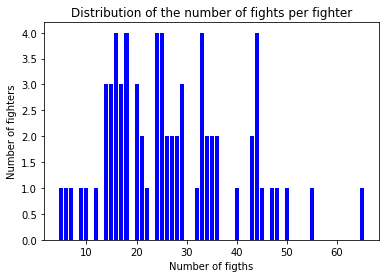

In [17]:
# plot the results
plt.bar(number_fighters_with_such_number_of_fights.keys(), number_fighters_with_such_number_of_fights.values(), color='b')
plt.title('Distribution of the number of fights per fighter')
plt.xlabel('Number of figths')
plt.ylabel('Number of fighters')
plt.show()

#### What about this plot?

> We can conclude there is no clear distribution. There are lots of retired fighters that have between 14 and less than 30 fights. But the fact is that it depends on the age they fought for the first time, the weight class they belong to, the results they got and so on ...

> But what is the number of fights for an average fighter?

In [18]:
def get_avg_number_fights(df_fighters_to_consider):
    return int(df_fighters_to_consider['number_of_fights'].mean())

In [19]:
print('An average fighter fights {} times before retiring'.format(get_avg_number_fights(df_fighters_retired)))

An average fighter fights 26 times before retiring


### Events data set

> We still have a lot to explore! We have data on events from the first UFC event to the last one.

> The UFC seems to organize the events in the U.S. and not so much outside the U.S. Is that true?

> Some fans find there are too much events. A lot more than before. We'll check that too.

In [20]:
# load data from the dataset into a pandas dataframe
df_events = pd.read_csv('../data/formated/events.csv')

In [21]:
locations = df_events['location'].dropna()

In [51]:
# let's create a small function that could be useful later
def get_distribution(data):
    """returns a dictionnary with the frequency of each value in the data given"""
    distribution = {}
    for value in data:
        if value not in distribution:
            distribution[value] = 1
        else:
            distribution[value] += 1
    return distribution

In [52]:
# get the number of events that a city hosted
number_events_per_city = get_distribution(locations)
# sorting, first item in the list will be the city with the biggest number of events hosted
number_events_per_city_sorted = sorted(number_events_per_city.items(), key=lambda x: x[1], reverse=True)
# print top 5 by slicing the list sorted 
number_events_per_city_sorted[:5]

[('Las Vegas, Nevada', 88),
 ('Las Vegas, NV', 37),
 ('Toronto, Ontario', 14),
 ('Denver, CO', 12),
 ('London, England', 8)]

## New data set, new questions
> At present, we'll dive into more details with this data set that contains data about all fights from the beginning of the UFC

> Let's explore that new data set quickly!

In [53]:
df_fights = pd.read_csv('../data/formated/fights.csv')
df_fights.head(5)

,fighter1_last_name,fighter2_last_name,weight_class,fighter1reach,fighter2reach,fighter1height,fighter2height,is_title_fight,is_main_event,fighter1_rank,...,fighter2_is_winner,method,ending_time,ending_time.1,ending_round,submission,end_strike,end_target,end_position,is_fotn
0,To Be Announced,To Be Determined,Welterweight,NaN,NaN,0,0,False,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hunt,Oleinik,Heavyweight,72.0,80.0,70,74,False,True,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akhmedov,Dollaway,Middleweight,73.0,76.0,72,74,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,76.0,71,75,NaN,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,73.0,74.0,70,71,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Doesn't look good! Well, it's normal! The API returns data about fights including upcoming fights. So there are missing values but that's fine we'll clear that data later.

> Let's take another slice of data, randomly in the data set

In [25]:
df_fights[85:90]

,fighter1_last_name,fighter2_last_name,weight_class,fighter1reach,fighter2reach,fighter1height,fighter2height,is_title_fight,is_main_event,fighter1_rank,...,fighter2_is_winner,method,ending_time,ending_time.1,ending_round,submission,end_strike,end_target,end_position,is_fotn
85,Felder,Perry,Welterweight,70.0,71.0,71,70,False,False,NaN,...,True,Decision - Split,05:00,05:00,3.0,NaN,NaN,NaN,NaN,NaN
86,Chiesa,Pettis,Lightweight,75.0,72.0,73,70,False,False,12,...,True,Submission,00:52,00:52,2.0,Triangle Choke,NaN,NaN,From Bottom Guard,NaN
87,Saki,Rountree Jr.,Light_Heavyweight,73.0,74.0,72,73,False,False,NaN,...,True,KO/TKO,01:36,01:36,1.0,NaN,Punches,Head,At Distance,NaN
88,Hall,Costa,Middleweight,79.0,72.0,72,73,False,False,12,...,True,KO/TKO,02:38,02:38,2.0,NaN,Punches,Body,At Distance,NaN
89,Assuncao,Font,Bantamweight,66.0,71.0,65,68,False,False,3,...,False,Decision - Unanimous,05:00,05:00,3.0,NaN,NaN,NaN,NaN,NaN


> Looks much nicer! We have some interesting information about the fights like the way it ended and who is the winner.

> Time for questions!

> What can we get from this? What about ...
1. The distribution of the ways to finish?
2. The reach advantage. Is that truly an advantage?
3. The stats on title fights, main events and regular fights.
4. The way to get a Fight Of The Night (FOTN) bonus.
5. The most common submssions in UFC. Did it evolve? Are there some trends?

In [37]:
ways_to_finish = df_fights['method'].dropna()
distribution_ways_to_finish = get_distribution(ways_to_finish)

In [38]:
distribution_ways_to_finish

{'KO/TKO': 1532,
 'Decision - Unanimous': 1568,
 'Submission': 986,
 'Decision - Split': 448,
 'Decision - Majority': 50,
 "TKO - Doctor's Stoppage": 68,
 'DQ': 14,
 'Overturned': 34,
 'Could Not Continue': 12,
 'Other': 2}

> Ok, this is interesting. I guess *DQ* stands for *Disqualified*. But I don't know about you but I don't get the meaning of *Overturned* and *Could not continue* in that context.  Let's use our human knowledge to understand the meaning of those words.

In [39]:
df_fights[df_fights['method'] == 'Overturned'].head(3)

,fighter1_last_name,fighter2_last_name,weight_class,fighter1reach,fighter2reach,fighter1height,fighter2height,is_title_fight,is_main_event,fighter1_rank,...,fighter2_is_winner,method,ending_time,ending_time.1,ending_round,submission,end_strike,end_target,end_position,is_fotn
550,Cormier,Jones,Light_Heavyweight,72.0,84.0,71,76,True,True,C,...,False,Overturned,03:01,03:01,3.0,NaN,Kick,Head,At Distance,NaN
597,Bessette,Holobaugh,Featherweight,NaN,NaN,70,71,False,True,NaN,...,False,Overturned,02:59,02:59,1.0,NaN,Punches,Head,At Distance,NaN
746,Belfort,Gastelum,Middleweight,74.0,71.0,72,69,False,True,NaN,...,False,Overturned,03:52,03:52,1.0,NaN,Punch,Head,In Clinch,NaN


> Ok now I see. This label is given to a fight when at least one of the fighters has been tested positive to illicit products. That's what happened to Jon Jones for example. Hew won that fight against Cormier but has been tested positive afterwards.

> What about *Could not continue*?

In [40]:
df_fights[df_fights['method'] == 'Could Not Continue'].head(2)

,fighter1_last_name,fighter2_last_name,weight_class,fighter1reach,fighter2reach,fighter1height,fighter2height,is_title_fight,is_main_event,fighter1_rank,...,fighter2_is_winner,method,ending_time,ending_time.1,ending_round,submission,end_strike,end_target,end_position,is_fotn
689,Alvarez,Poirier,Lightweight,69.0,72.0,69,69,False,False,3,...,False,Could Not Continue,04:02,04:02,2.0,NaN,NaN,NaN,NaN,NaN
835,Oliveira,Means,Welterweight,76.0,75.0,71,74,False,False,14,...,False,Could Not Continue,03:33,03:33,1.0,NaN,NaN,NaN,NaN,NaN


> Looks like another definition of **no contest**.

> As far as I know, the two first fights in this list ended up in a **no contest** decision because of illegal shots. I remember those illegal knees from Alvarez. The rule is that you can't throw a knee to the head of your opponent if he has one hand on the ground. This is what Alvarez did.

> To conclude, all those fights are not relevant for our analysis because there actually is no result.

> Ok so now we can create the final dictionnary that contains the distribution of ways to finish.
We can gather the number of split decisions with the number of unanimous and majority decisions.

In [41]:
number_of_decisions = distribution_ways_to_finish['Decision - Unanimous'] \
                        + distribution_ways_to_finish['Decision - Split'] \
                        + distribution_ways_to_finish['Decision - Majority']
distribution_ways_to_finish.pop('Decision - Unanimous')
distribution_ways_to_finish.pop('Decision - Split')
distribution_ways_to_finish.pop('Decision - Majority')
distribution_ways_to_finish.pop('DQ')
distribution_ways_to_finish.pop('Overturned')
distribution_ways_to_finish.pop('Other')
distribution_ways_to_finish.pop('Could Not Continue')
distribution_ways_to_finish['Decision'] = number_of_decisions

> Let's visualize that with a beautiful pie chart!

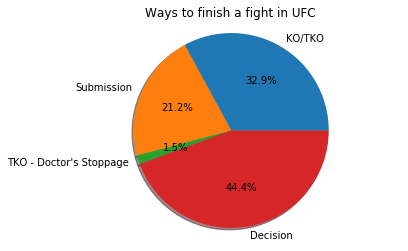

In [56]:
# data to plot, need to convert the dictionnary into two lists
labels = distribution_ways_to_finish.keys()
sizes = distribution_ways_to_finish.values()

# actual plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
 
plt.axis('equal')
plt.title('Ways to finish a fight in UFC')
plt.show()

### Conclusion

> From that we can conclude that if a fight has a winner and there is no disqualification afterwards, the most common way for a random fight to finish is the descision of the judges (almost half of the fights). Then comes the KO/TKO (one third of the fights) and the submission (a bit more than one fifth).

> No surprise here it would be interesting to compare the distribution from each year. Has it significantly changed? And secondly, it could be interesting to make the same study for each category and in function of the gender.